In [77]:
%matplotlib notebook
from astropy.table import Table
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
plt.ion()

mpl.rc('text', usetex=True)

# Load the classified catalog

In [2]:
infall = Table().read('../catalogs/classified_surfacedensity.csv')
infall = infall[np.where((infall['morph'] != 'C') &
                         (infall['morph'] != 'U'))]
infall.sort('surface_density_compcorred')

# Load the High-z results from Postman+2005

In [110]:
postman = np.loadtxt('./external-data/postman05_fractions.dat', skiprows=1)

In [114]:
postman[:,0]

array([  19.849,   39.692,   79.374,  158.73 ,  317.41 ,  634.73 ,
       1269.3  ])

# Make even bins in surface density

In [3]:
n_bins = 5
#n_per_bin = int(len(infall)/n_bins)

In [4]:
n_per_bin = int(len(infall)/n_bins)
infall['rhobin'] = np.ones(len(infall), dtype='int8')*-1
counter, setval = 0, 0

for row in infall:
    row['rhobin'] = setval
    counter += 1
    if int(counter) == int(n_per_bin):
        counter = 0
        setval += 1

# We have 1 straggler, put it in the last bin
infall[-1]['rhobin'] = 4

# Plot the fractions in each bin

In [96]:
def compute_binned_fractions(table, morph):
    binids = list(set(infall['rhobin']))
    ntot, nmorph = np.ones(len(binids))*-1, np.ones(len(binids))*-1
    rhomin, rhomax = np.ones(len(binids))*-1, np.ones(len(binids))*-1
    for i in binids:
        onebin = table[np.where(table['rhobin'] == i)]
        ntot[i] = float(len(onebin))
        nmorph[i] = float(len(onebin[np.where(onebin['morph'] == morph)]))
        rhomin[i] = min(onebin['surface_density_compcorred'])
        rhomax[i] = max(onebin['surface_density_compcorred'])
    return nmorph, {'nmorph': nmorph, 'ntot': ntot, 'rhomin': rhomin, 'rhomax': rhomax}

#### Subplot details

In [107]:
plotdeetz = [
    {
        'morph': ["E"], 
        'ylabel': r'$f_{\rm E}$'
    },
    {
        'morph': ["S0"], 
        'ylabel': r'$f_{\rm S0}$'
    },
    {
        'morph': ["E", "S0"], 
        'ylabel': r'$f_{\rm E+S0}$'
    },
    {
        'morph': ["Irr", "Sa", "Sb", "Sc", "Sd", "Sm"], 
        'ylabel': r'$f_{\rm Sp+Irr}$'
    }
]

#### Make the plot

<IPython.core.display.Javascript object>


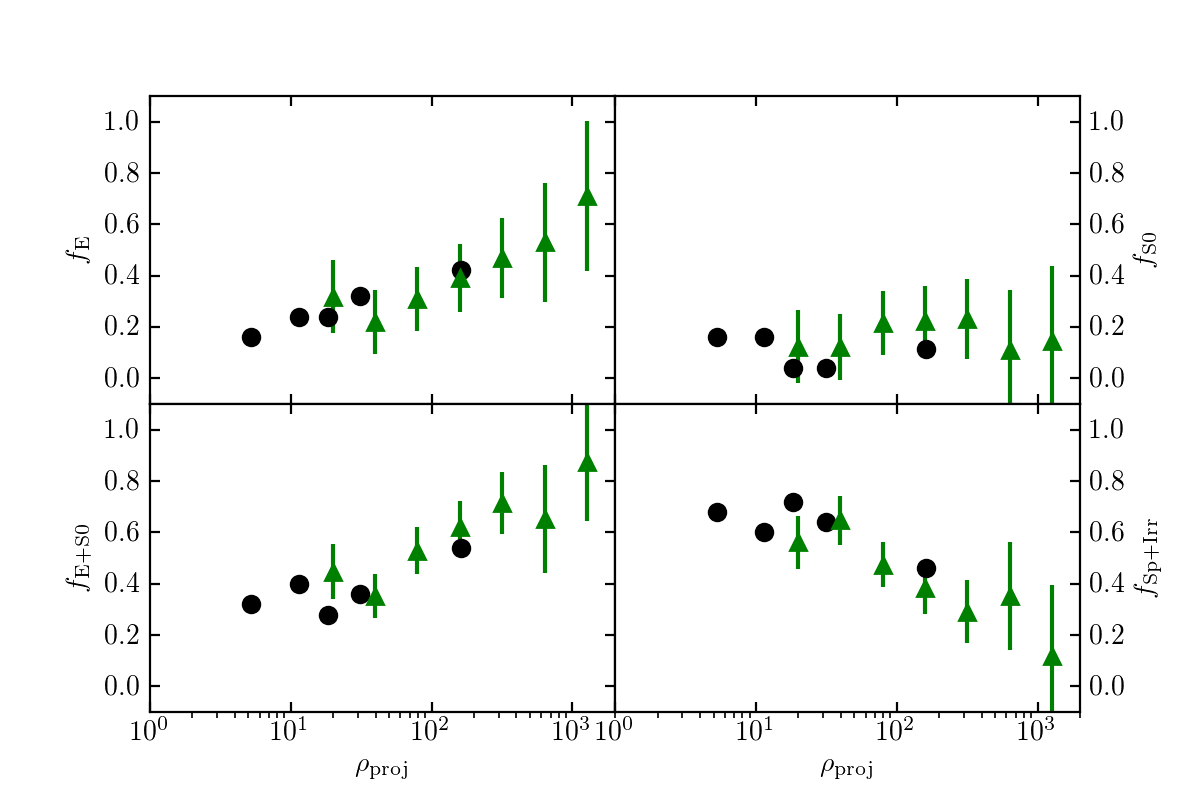

In [119]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(6,4))
axs = axs.flatten()

for ax, i in zip(axs, range(4)):
    # Plot the fraction in infall region
    nmorphs = np.zeros(n_bins)
    for morph in plotdeetz[i]['morph']:
        nmorph_single, res = compute_binned_fractions(infall, morph)
        nmorphs+=nmorph_single    
    xs = (res['rhomin']+res['rhomax'])/2.
    ys = nmorphs/res['ntot']
    ax.errorbar(xs, ys, fmt='ok')

    # Plot the High-Z Postman+05 results
    ax.errorbar(postman[:,0], postman[:,int(i*2+1)], fmt='^g', yerr=postman[:,int(i*2+2)]-postman[:,int(i*2+1)])
    
    # Format the axes
    ax.set_xscale('log')
    ax.set_xlim((1, 2000))
    ax.set_ylim((-0.1, 1.1))
    ax.set_yticks((0.0, .2, .4, .6, .8, 1.))
    ax.set_ylabel(plotdeetz[i]['ylabel'])
    ax.tick_params(direction='in', top=True, right=True, left=True, bottom=True)

# General axis formatting
#yticks = (0.0, .2, .4, .6, .8, 1.)

axs[0].set_xticklabels(());

axs[1].set_xticklabels(());
axs[1].yaxis.tick_right()
axs[1].yaxis.set_label_position('right')

axs[2].set_xlabel(xlabel)

axs[3].set_xlabel(xlabel)
axs[3].yaxis.tick_right()
axs[3].yaxis.set_label_position('right')

fig.subplots_adjust(wspace=.001, hspace=.001)

In [38]:
set(infall['morph'])

{'E', 'Irr', 'S0', 'Sa', 'Sb', 'Sc', 'Sd', 'Sm'}